# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [2]:
%cd /content/drive/MyDrive/Course Material/Neural Networks For Text Classification

/content/drive/MyDrive/Course Material/Neural Networks For Text Classification


In [2]:
df = pd.read_csv('bbc-text.csv')

In [3]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


# Change column names to label and text

In [4]:
df.columns = ['labels', 'text']

In [5]:
df.head()

,labels,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


# Check if the data is balanced

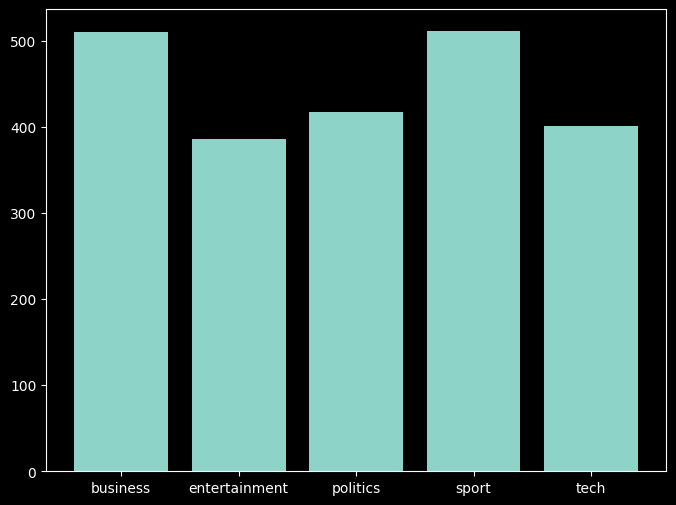

In [6]:
plt.figure(figsize = (8,6))
x, y = np.unique(df['labels'], return_counts=True)
plt.bar(x, y, align='center')
plt.gca().set_xticks(x)
plt.show()

In [8]:
df['labels'].value_counts()

,count
labels,
sport,511
business,510
politics,417
tech,401
entertainment,386


# Convert Labels into integers

In [9]:
df['labels'] = df['labels'].map({'sport': 0, 'business': 1, 'politics': 2, 'tech': 3, 'entertainment': 4})

In [10]:
df.head()

,labels,text
0,3,tv future in the hands of viewers with home th...
1,1,worldcom boss left books alone former worldc...
2,0,tigers wary of farrell gamble leicester say ...
3,0,yeading face newcastle in fa cup premiership s...
4,4,ocean s twelve raids box office ocean s twelve...


# Check for Null Values

In [11]:
df.isnull().any()

,0
labels,False
text,False


# Extarct features and labels

In [12]:
features = df['text']
labels = df['labels']

# Perform train-test split

In [13]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Instantiate TFIDF Vectorizer and fit and tranform on training and testing data

In [14]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train_data)
X_test = vectorizer.transform(test_data)

In [15]:
X_train

<1780x26327 sparse matrix of type '<class 'numpy.float64'>'
	with 257235 stored elements in Compressed Sparse Row format>

## Data must not be sparse matrix type before passing into tensorflow. Convert them to array.

In [16]:
X_train = X_train.toarray()
X_test = X_test.toarray()

# Check the dimensionality OR features in input data

In [17]:
D = X_train.shape[1]
print(D)

26327


# Create Neural Network Model

In [18]:
model = Sequential()
model.add(Dense(units = 256, input_shape =(D, ), activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 5, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │       6,739,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,758,661 (25.78 MB)

 Trainable params: 6,758,661 (25.78 MB)

 Non-trainable params: 0 (0.00 B)

# Compile the Model

In [20]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01) ,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Model

In [21]:
train = model.fit(
  X_train, train_labels,
  validation_data=(X_test, test_labels),
  epochs = 60,
)

Epoch 1/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.2311 - loss: 1.6083 - val_accuracy: 0.2404 - val_loss: 1.6062
Epoch 2/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.2253 - loss: 1.6059 - val_accuracy: 0.2562 - val_loss: 1.6039
Epoch 3/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.2611 - loss: 1.5995 - val_accuracy: 0.2719 - val_loss: 1.6013
Epoch 4/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.2735 - loss: 1.5965 - val_accuracy: 0.2854 - val_loss: 1.5986
Epoch 5/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.3084 - loss: 1.5938 - val_accuracy: 0.3506 - val_loss: 1.5956
Epoch 6/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.3467 - loss: 1.5908 - val_accuracy: 0.3843 - val_loss: 1.5923
Epoch 7/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.3386 - loss: 1.5914 - val_accuracy: 0.3843 - val_loss: 1.5890
Epoch 8/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.3358 - loss: 1.5854 - val_accuracy: 0.4000 - 

# Visualizing Model Performance

In [22]:
trainAcc = [100 * x for x in train.history['accuracy']]
testAcc = [100 * x for x in train.history['val_accuracy']]

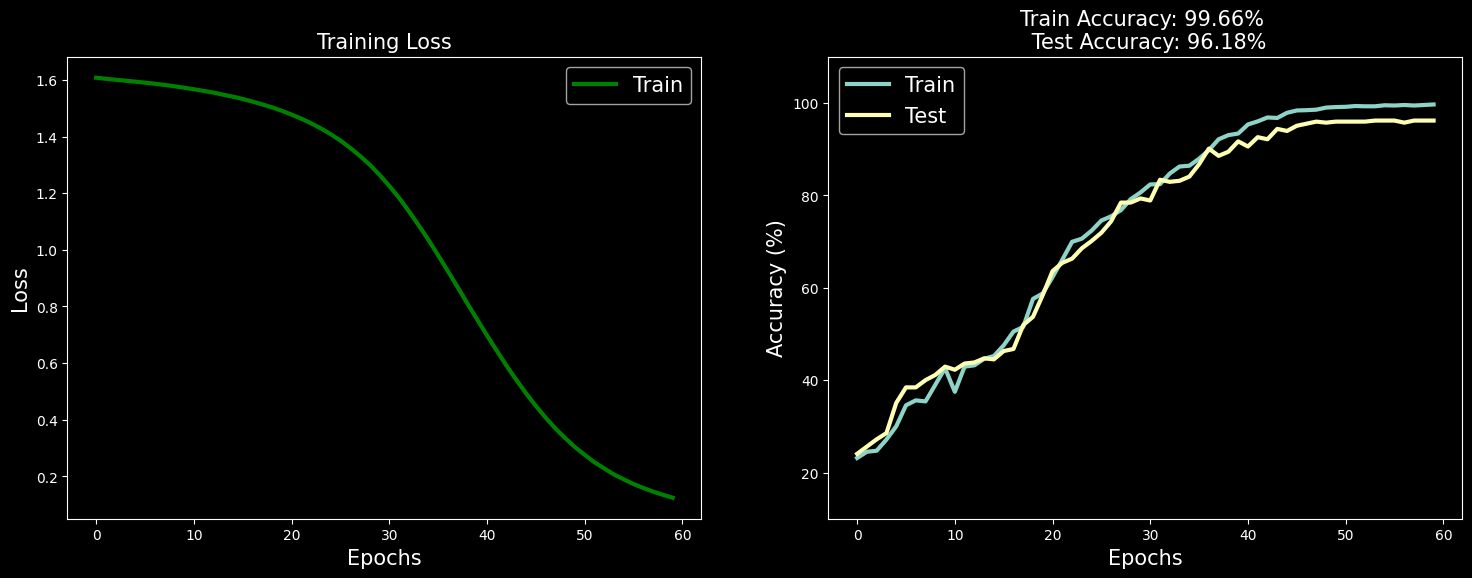

In [23]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(train.history['loss'], 'g', lw = 3, label = 'Train')
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].legend(fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)


ax[1].plot(trainAcc, label ='Train', lw = 3)
ax[1].plot(testAcc, label ='Test', lw = 3)
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim([10,110])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()

# Observe the Predicted Labels

In [24]:
y_pred = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [25]:
y_pred.round(2)

array([[0.  , 0.  , 0.99, 0.  , 0.01],
       [0.02, 0.92, 0.01, 0.03, 0.02],
       [0.02, 0.01, 0.01, 0.01, 0.96],
       ...,
       [0.01, 0.96, 0.  , 0.01, 0.01],
       [0.01, 0.95, 0.01, 0.03, 0.01],
       [0.1 , 0.65, 0.05, 0.07, 0.14]], dtype=float32)

In [26]:
pred_labels = np.argmax(y_pred, axis = 1)

In [27]:
pred_labels

array([2, 1, 4, 3, 0, 1, 1, 0, 0, 3, 4, 4, 4, 4, 4, 3, 2, 0, 4, 1, 4, 4,
       1, 2, 2, 2, 2, 0, 4, 0, 2, 3, 2, 4, 1, 4, 3, 1, 3, 0, 1, 0, 4, 1,
       4, 4, 1, 0, 4, 0, 1, 0, 4, 4, 4, 1, 2, 1, 4, 1, 4, 3, 1, 1, 2, 0,
       0, 4, 1, 1, 4, 1, 3, 3, 1, 2, 3, 4, 1, 3, 1, 2, 2, 4, 2, 0, 0, 4,
       0, 0, 2, 4, 3, 1, 2, 1, 0, 2, 2, 3, 1, 3, 0, 0, 3, 1, 2, 1, 4, 2,
       0, 2, 2, 0, 3, 0, 0, 1, 2, 2, 2, 0, 2, 4, 4, 0, 3, 2, 0, 4, 3, 2,
       1, 1, 0, 3, 4, 1, 2, 2, 0, 1, 0, 4, 4, 0, 4, 4, 3, 1, 4, 3, 4, 1,
       3, 1, 0, 2, 2, 0, 1, 3, 0, 0, 1, 0, 3, 0, 2, 0, 1, 2, 1, 2, 3, 0,
       0, 4, 1, 0, 3, 3, 2, 3, 2, 3, 3, 3, 4, 2, 3, 3, 0, 1, 2, 3, 2, 3,
       1, 0, 2, 3, 3, 0, 0, 1, 4, 0, 1, 0, 2, 4, 1, 2, 0, 1, 1, 4, 0, 2,
       0, 2, 2, 2, 0, 4, 3, 4, 2, 1, 3, 2, 3, 4, 1, 0, 0, 2, 0, 0, 2, 1,
       1, 4, 4, 0, 2, 3, 0, 1, 2, 1, 0, 3, 0, 1, 1, 0, 3, 3, 4, 3, 4, 2,
       4, 2, 2, 0, 1, 2, 3, 3, 4, 4, 4, 0, 0, 1, 0, 3, 4, 3, 0, 0, 0, 2,
       4, 4, 0, 4, 1, 0, 0, 2, 1, 0, 3, 1, 1, 1, 2,

# Print the classification Report

In [28]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

In [29]:
print("Accuracy : %2.2f" % (accuracy_score(test_labels, pred_labels, normalize=True)))
print("Precision : %2.2f" % (precision_score(test_labels, pred_labels, average = 'macro')))
print("Recall : %2.2f" % (recall_score(test_labels, pred_labels, average = 'macro')))
print("F1_Score : %2.2f" % (f1_score(test_labels, pred_labels, average = 'macro')))

Accuracy : 0.96
Precision : 0.96
Recall : 0.96
F1_Score : 0.96


In [30]:
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        98
           1       0.92      0.96      0.94       101
           2       0.96      0.94      0.95        83
           3       0.97      0.95      0.96        82
           4       0.99      0.95      0.97        81

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445

